In [2]:
cd /home/randolpwanjiru/DSP4380/Computer Vision/dataloader

/home/randolpwanjiru/DSP4380/Computer Vision/dataloader


In [3]:
ls

Dataloader.ipynb  Dataloader.py  __pycache__/


Dataloader.ipynb  Dataloader.py  __pycache__
Found 202 files belonging to 2 classes.
Using 162 files for training.
Using 40 files for validation.


2024-04-24 21:39:16.611751: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:3b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-24 21:39:16.612465: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-04-24 21:39:17.260957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


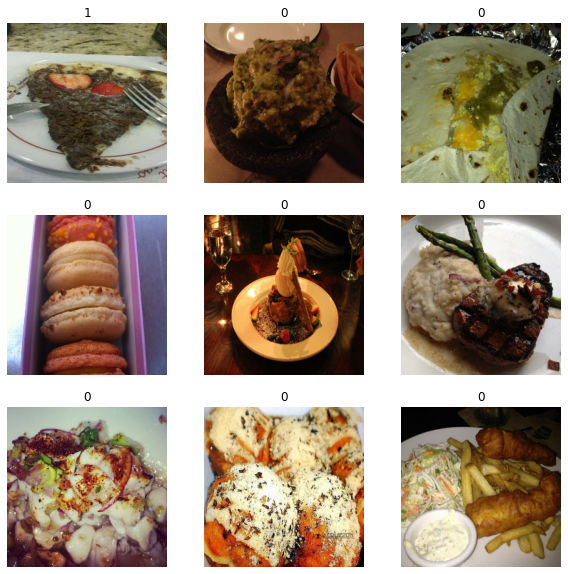

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from Dataloader import load_image_dataset
import random
from tensorflow.keras import datasets, layers, models

In [5]:
# Load image datasets using your Dataloader module
train_ds, valid_ds = load_image_dataset("/home/randolpwanjiru/DSP4380/Computer Vision/archive (17)/pizza_not_pizza")

Found 202 files belonging to 2 classes.
Using 162 files for training.
Found 202 files belonging to 2 classes.
Using 40 files for validation.


## Data Augmentation: 
Three types
* Flip horizontal
* Rotate image
* Adjust for brightness 

In [24]:
from tensorflow.keras.models import Model

In [25]:
def build_mobilenet_model(input_shape, num_classes):
    # Load the MobileNetV2 model without the top (fully connected) layers
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the convolutional layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top of the base model
    x = base_model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes, activation='sigmoid')(x)  # Assuming binary classification

    # Create the final model
    model = Model(inputs=base_model.input, outputs=output)

    return model

In [27]:
def augment_data(images, labels):
    # Apply random flip horizontally
    images = tf.image.random_flip_left_right(images)
    
    # Apply random rotation
    images = tf.image.rot90(images, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    
    # Apply random brightness adjustment
    images = tf.image.random_brightness(images, max_delta=0.2)
    
    images = tf.image.random_contrast(images, lower=0.8, upper=1.2)
    
    return images, labels

In [32]:
# Define your model input shape and number of classes
input_shape = (224, 224, 3)  # Assuming input image shape
num_classes = 1  # Assuming binary classification

# Build your model
model = build_mobilenet_model(input_shape, num_classes)

# Compile your model

In [33]:
# Compile your model
lr = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
              loss='binary_crossentropy',  # Update the loss function
              metrics=['accuracy'])

epochs = 10
history = model.fit(train_ds,
                    validation_data=valid_ds,
                    epochs=epochs,
                    verbose=1)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 826ms/step - accuracy: 0.5127 - loss: 1.5886 - val_accuracy: 0.6250 - val_loss: 0.7784
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 762ms/step - accuracy: 0.7572 - loss: 0.5717 - val_accuracy: 0.6500 - val_loss: 0.7469
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 698ms/step - accuracy: 0.8111 - loss: 0.3706 - val_accuracy: 0.7000 - val_loss: 0.6138
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 826ms/step - accuracy: 0.8856 - loss: 0.3305 - val_accuracy: 0.7250 - val_loss: 0.5948
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 811ms/step - accuracy: 0.9497 - loss: 0.1644 - val_accuracy: 0.7750 - val_loss: 0.5323
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 904ms/step - accuracy: 0.9115 - loss: 0.2052 - val_accuracy: 0.7750 - val_loss: 0.5045
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 693ms/step - accuracy: 0.9749 - loss: 0.1296 - val_accuracy: 0.8250 - val_loss: 0.4801
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 672ms/step - accuracy: 0.9723 - loss: 0.1002 - val_accuracy: 0.8000 - val_loss:

In [39]:
valid_ds_augmented = valid_ds.map(augment_data)

2024-04-24 23:27:18.040783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


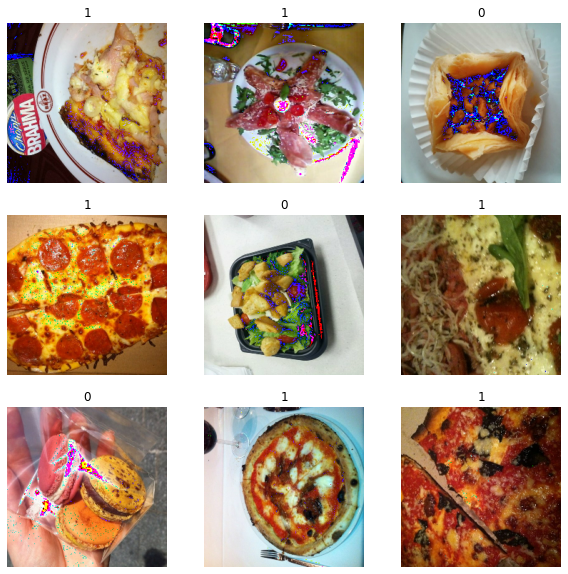

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))

for images, labels in valid_ds_augmented.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


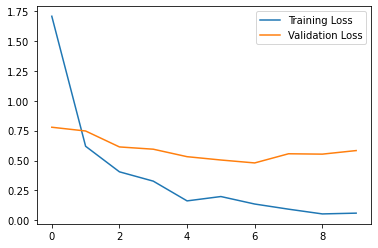

In [35]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

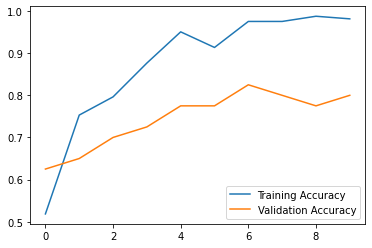

In [36]:
plt.plot(range(len(history.history["accuracy"])),history.history["accuracy"],label="Training Accuracy")
plt.plot(range(len(history.history["val_accuracy"])),history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()

In [38]:
model.save('/home/randolpwanjiru/DSP4380/Computer Vision/TrainBaseModel_Augmentations/TrainBaseAugmentation.keras')